## Needed Visualizations

- [x] full network viz of people
- [x] full network viz of texts
- [x] key people over time (degree, betweenness)
- [x] network density over time
- [x] Luther, Calvin, Hus degree over time
- [x] bar graph of degree in 1630s, 40s, 50s, and 60s

In [1]:
import networkx as nx
from networkx.readwrite import json_graph
from networkx.algorithms import bipartite, community
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

plt.style.use('ggplot')

In [8]:
with open('all_eebo.json', 'r') as jsonfile:
    jsonstring = jsonfile.read()
    data = json.loads(jsonstring)

In [9]:
B = json_graph.node_link_graph(data)
print(nx.info(B))

conn = sqlite3.connect('../data/eebo_tcp_metadata.sqlite')
c = conn.cursor()

for text_id,d in B.nodes(data=True):
    if B.node[text_id]['bipartite'] == 1:
        c.execute('SELECT title FROM metadata WHERE key=?', (text_id,))
    #     print(c.fetchone())
        fetched = c.fetchone()
        if fetched == None:
            new_title = "Not Found"
        else:
            new_title = fetched[0]
    #   print(new_title)
        B.node[text_id]['title'] = new_title
    #     del TS.node[n[0]]['name_variants']

# for text_id,data in TS.nodes(data=True):
#     for k,v in data.items():
#         if v == None:
#             TS.node[text_id][k] = "Not Found"

nx.write_gexf(B, "full_network.gexf")
conn.close()

Name: 
Type: Graph
Number of nodes: 41619
Number of edges: 51123
Average degree:   2.4567


KeyError: <class 'NoneType'>

In [4]:
people_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==1}
text_nodes = set(B) - people_nodes

In [26]:
P = bipartite.weighted_projected_graph(B, people_nodes)
print(nx.info(P))

Name: 
Type: Graph
Number of nodes: 29368
Number of edges: 311822
Average degree:  21.2355


In [6]:
T = bipartite.weighted_projected_graph(B, text_nodes)
print(nx.info(T))

Name: 
Type: Graph
Number of nodes: 12251
Number of edges: 4114227
Average degree: 671.6557


In [7]:
def write_json(B, filename):
    """
    Given NetworkX graph object and filename, create JSON representation for D3.
    """
    print("Writing JSON file...")
    new_data = json_graph.node_link_data(B)
    with open(filename, 'w') as output:
        json.dump(new_data, output, sort_keys=True, indent=4, separators=(',',':'))

In [8]:
write_json(P, 'people_only.json')

Writing JSON file...


In [9]:
# print(list(P.edges(data=True))[:100])
fewer_edges = {(s,t) for s,t,d in P.edges(data=True) if d['weight']>1}
print(len(fewer_edges))
PS = P.edge_subgraph(fewer_edges)
print(nx.info(PS))
write_json(PS, 'people_more_than_two.json')

9148
Name: 
Type: Graph
Number of nodes: 3078
Number of edges: 9148
Average degree:   5.9441
Writing JSON file...


In [36]:
text_fewer_edges = {(s,t) for s,t,d in T.edges(data=True) if d['weight']>2}
print(len(text_fewer_edges))
TS = T.edge_subgraph(text_fewer_edges)
print(nx.info(TS))
# write_json(TS, 'texts_more_than_two.json')

conn = sqlite3.connect('../data/eebo_tcp_metadata.sqlite')
c = conn.cursor()

for text_id,data in TS.nodes(data=True):
    c.execute('SELECT title FROM metadata WHERE key=?', (text_id,))
#     print(c.fetchone())
    fetched = c.fetchone()
    if fetched == None:
        new_title = "Not Found"
    else:
        new_title = fetched[0]
#     print(new_title)
    TS.node[text_id]['title'] = new_title
#     del TS.node[n[0]]['name_variants']

# for text_id,data in TS.nodes(data=True):
#     for k,v in data.items():
#         if v == None:
#             TS.node[text_id][k] = "Not Found"
    
nx.write_gexf(TS, "texts.gexf")
conn.close()

6008
Name: 
Type: Graph
Number of nodes: 1130
Number of edges: 6008
Average degree:  10.6336
The blasphemous Socinian heresie disproved and confuted wherein the doctrinal and controversial parts of those points are handled, and the adversaries scripture and school-arguments answered : with animadversions upon a late book called, Christianity not mysterious, humbly dedicated to both houses of parliament / by J. Gailhard ...
A golden chaine of divine aphorismes written by John Gerhard Doctor of Divinitie and superintendent of Heldburg. Translated by Ralph Winterton fellow of Kings Colledge in Cambridge
An exposition of the lawes of Moses Viz. Morall. Ceremoniall. Iudiciall. The second volume. Containing an explanation of diverse questions and positions for the right understanding thereof. Wherein also are opened divers ancient rites & customes of the Iewes, and also of the Gentiles, as they haue relation to the Iewish. Together with an explication of sundry difficult texts of Scripture, 

The way of true peace and unity in the true church of Christ in all humility and bowels of love presented to them / by William Dell.
Rome tyrannical, idolatrous and heretical the origine of her errors with an answer to her objections : also three short sermons of repentance against swearing and drunkenness preached to the ships company before Admiral Aylmer and several captains / by Peter Berault.
A sons patrimony and daughters portion payable to them at all times but best received in their first times when they are young and tender : laid-out without expence of money only in the improving time and words with them contained (in an answerablenesse to their ages) in two volumes ...
The beauty of magistracy in an exposition of the 82 Psalm, where is set forth the necessity, utility, dignity, duty, and mortality of magistrates : here many other texts of Scripture occasionally are cleared, many quries and cases of conscience about the magistrates power, are resolved, many anabaptistical cav

Britannia triumphans; or An effectual method wholly to destroy the power of France by encouraging navigation in all its branches. Whereby their Majesties fleet may be sufficiently mann'd in a months time, on any occasion, without impressing; and by making a competent provision for such as shall be wounded in the service of Their Majesties, against the common enemy, in whatsoever stations they are placed. All which may be effected without any very considerable charge to the kingdom. Together with a brief enumeration of the several advantages to be made by erecting a publick fishery, by which a constant nursery of able seamen, and a security and enlargement of our trade abroad will be surely advanced. To which are subjoined, some proposals for the support and maintenance of the children of sll such as fall in the said service; and the certain and best expedient of encreasing the numbers of our privateers. Humbly represented to Their Majesties, and Members of Parliament. By Capt. St. Loe,

A reflection of certaine authors that are pretended to disauow the churches infallibilitie in her generall decrees of faith. By F.E.
A notable historie containing foure voyages made by certayne French captaynes vnto Florida vvherein the great riches and fruitefulnes of the countrey with the maners of the people hitherto concealed are brought to light, written all, sauing the last, by Monsieur Laudonniere, who remained there himselfe as the French Kings lieuetenant a yere and a quarter: newly translated out of French into English by R.H. In the end is added a large table for the better finding out the principall matters contayned in this worke.
Cardines cli, or, An appeal to the learned and experienced observers of sublunars and their vicissitudes whether the cardinal signes of heaven are not most influential upon men and things proved by X. remarkable genitures, &c. in a reply to the learned author of Cometomantia wherein the character of Gassendus is defended and sundry other starry t

[Taylors goose] [describing the wilde goose]
The marrovv of the oracles of God. Or, diuers treatises containing directions about sixe of the waightiest things can concerne a Christian in this life. by N. Bifield, late preacher of Gods Word at Isleworth in Middlesex.
Divine consolations, or, The teachings of God in three parts ... with an answer to the objections made against it, and Doctor Crips [sic] booke justified against Steven Geree / by Samuel Richardson.
The crovvne of righteousnes: or, The glorious reward of fidelity in the discharge of our duty. As it was laid forth in a sermon, preached in S. Botolphs Aldersgate, London, Sept. 25. 1653. At the solemn funerall of Mr. Abrah: Wheelock, B. D. the first publick professor, and reader of Arabick, and of the Saxon, in the University of Cambridge. Whereunto is added, an encomium of him. / By William Sclater Doctor in Divinity, now preacher of the Word of God in Broad-street, Lond.
The praise of a good name The reproch of an ill name. 

Annales the true and royall history of the famous empresse Elizabeth Queene of England France and Ireland &c. True faith's defendresse of diuine renowne and happy memory. Wherein all such memorable things as happened during hir blessed raigne ... are exactly described.
The historie of Leonard Aretine concerning the warres betwene the Imperialles and the Gothes for the possession of Italy, a worke very pleasant and profitable. Translated out of Latin into Englishe by Arthur Goldyng.
The vvay to everlasting happinesse: or, the substance of christian religion methodically and plainly handled in a familiar discourse dialogue-wise: wherein, the doctrine of the Church of England is vindicated; the ignorant instructed, and the faithfull directed in their travels to heaven. By Benjamin Spencer, preacher of the word of God at Bromley neer Bow in Middlesex.
The miscellanie, or, A registrie, and methodicall directorie of orizons Exhibiting a presentment of the soules requestes in the high court o

Ecclesia triumphans: that is, The ioy of the English church for the happie coronation of the most vertuous and pious prince, Iames by the grace of God, King of England, Scotland, France, and Ireland, defendour of the faith, &c. and for the ioyfull continuance of religion and peace by the same. With a briefe exposition of the 122. Psalme, and fit application to the time: wherein are declared the manifold benefits like to grow by these good beginnings to the church and common-wealth of England. Dedicated to the most gratious ladie and vertuous princess, Ioland Anne, by the grace of God, Queene of England, Scotland, France, &c.
Elisha his lamentation, upon the suddain translation of Elijah. Opened in a sermon at the funeral of Mr. VVilliam Strong, that eminently faithful servant and minister of Christ. By Obadiah Sedgwick, B.D. and preacher of the Gospel in Covent Garden.
Eighteen sermons preached in Oxford 1640 of conversion, unto God. Of redemption, & justification, by Christ. By the Ri

The life of the glorious bishop S. Patricke apostle and primate of Ireland Togeather with the lives of the holy virgin S. Bridgit and of the glorious abbot Saint Columbe patrons of Ireland.
Of the institution of the sacrament of the blessed bodie and blood of Christ, (by some called) the masse of Christ eight bookes; discovering the superstitious, sacrilegious, and idolatrous abominations of the Romish masse. Together with the consequent obstinacies, overtures of perjuries, and the heresies discernable in the defenders thereof. By the R. Father in God Thomas L. Bishop of Coventry and Lichfield.
The couragious Turke, or, Amurath the First A tragedie. Written by Thomas Goffe Master of Arts, and student of Christ-Church in Oxford, and acted by the students of the same house.
A golden trumpet, to rowse vp a drowsie magistrate: or, A patterne for a governors practise drawne from Christs comming to, beholding of, and weeping ouer Hierusalem. As it was founded at Pauls Crosse the 1. of Aprill

Iethroes counsell to Moses: or, A direction for magistrates A sermon preached at St. Saviours in Southwarke. March 5. 1621. before the honourable iudges by that reverent divine Thomas Sutton Dr. in Divinity.
God's Sabbath before, under the law and under the Gospel briefly vindicated from novell and heterodox assertions / by Hamon L'Estrange ...
Satans sophistrie ansuuered by our Sauiour Christ and in diuers sermons further manifested / by that worthy man Maister William Perkins ; to which is added, a comfort for the feeble minded, wherein is set downe the temptations of a Christian.
A mappe of mans mortalitie Clearely manifesting the originall of death, with the nature, fruits, and effects thereof, both to the vnregenerate, and elect children of God. Diuided into three bookes; and published for the furtherance of the wise in practise, the humbling of the strong in conceit, and for the comfort and confirmation of weake Christians, against the combat of death, that they may wisely and se

The art of making devises treating of hieroglyphicks, symboles, emblemes, nigma's, sentences, parables, reverses of medalls, armes, blazons, cimiers, cyphres and rebus / first written in French by Henry Estienne ... ; translated into English by Tho. Blount ...
The arraignment and conuiction of vsurie That is, The iniquitie, and vnlawfulnes of vsurie, displayed in sixe sermons, preached at Saint Edmunds Burie in Suffolke, vpon Prouerb. 28.8. By Miles Mosse, minister of the worde, and Bacheler of Diuinitie. Seene and allowed by authoritie. The especiall contents of this booke, are declared in the page next before the treatise it self. Reade all, or censure none.
A discourse concerning publick oaths, and the lawfulness of swearing in judicial proceedings written by Dr. Gauden ..., in order to answer the scruples of the Quakers.
A winding-sheet for the schism of England contriv'd for to inform the ignorant, resolve the wavering, and confirm the well principled Roman Catholick. By J. E. mis

Select and choyce observations, containing all the Romane emperours the first eighteen by Edward Leigh ... ; the others added by his son Henry Leigh ... ; certain choyce French proverbs, alphabetically disposed and Englished added also by the same Edward Leigh.
The spirit convincing of sinne opened in a sermon before the Honorable House of Commons, assembled in Parliament upon the solemne day of their monethly fast, Novemb. 26, 1645 / by Peter Sterry ...
A faithfull and plaine exposition vpon the 2. chapter of Zephaniah by that reuerend and iudicious diuine, M.W. Perkins. Containing a powerful exhortation to repentance: as also the manner hovve men in repentance are to search themselues. Published by a preacher of the vvord. With a preface prefixed, touching the publishing of M. Perkins his vvorks. And a catalogue of all such particulars thereof, as are to be expected.
An inquisition of the true church, and those that revolt from it being a sermon pronounced at the second session of th

Fiue sermons vpon speciall occasions (Viz.) 1. A sermon preached at Pauls Crosse. 2. To the Honorable the Virginia Company 3. At the consecration of Lincolnes Inne Chappell. 4. The first sermon preached to K. Charles at St. Iames, 1625. 5. A sermon preached to his Maiestie at White-hall, 24. Febr. 1625. By Iohn Donne Deane of Saint Pauls, London.
Usury stated overthrown: or, usuries champions with their auxiliaries, shamefully disarmed and beaten by an answer to its chief champion, which lately apeared in print to defend it. And Godliness epitomized by Christopher Jelinger, M.A. Beza upon Matth. May a man with a safe conscience lend upon usury? No surely. And holy Usher, Arch-Bishop of Armagh, in his Body of divinity, pag. 300. Q. What is that which we call usury? It is lending in expectation of certain gain. So he well stateth it against usury ill stated by T. P. Q. What do you think of it? If we speak of that properly, which the scripture condemneth, it is a most wicked and unlawful 

The Lords Supper or, A vindication of the sacrament of the blessed body and blood of Christ according to its primitive institution. In eight books; discovering the superstitious, sacrilegious, and idolatrous abomination of the Romish Master. Together with the consequent obstinacies, overtures of perjuries, and the heresies discernable in the defenders thereof. By Thomas Morton B.D. Bp. of Duresme.
A short sober pacific examination of some exuberances in, and ceremonial appurtenances to the Common prayer especially of the use and frequent repetitions of Glory be to the Father, &c., standing up at it, at Gospels, creeds, and wearing white rochets, surplises, with other canonical vestments in the celebration of divine service and sacraments, whose originals, grounds of institution and prescription, are here truly related and modestly discussed ... / by William Prynne, Esq. ...
Part of Du Bartas English and French, and in his owne kinde of verse, so neare the French Englished, as may teach

Poems on several occasions by the Duke of Buckingham, The late Lord Rochester, Sir John Denham, Sir George Etheridge, Andrew Marvel, Esq., the famous Spencer, Madam Behn, and several other poets of this age.
A moderate, seasonable apology for indulging just Christian liberty to truly tender consciences, conforming to the publike liturgy in not bowing at, or to the name of Jesus, and not kneeling in the act of receiving the Lords Supper, according to His Majesties most gracious declaration to all his loving subjects concerning ecclesiastical affairs ... / by William Prynne, Esquire ...
The principal nauigations, voyages, traffiques and discoueries of the English nation. [vols. 1-3] made by sea or ouer-land, to the remote and farthest distant quarters of the earth, at any time within the compasse of these 1600. yeres: deuided into three seuerall volumes, according to the positions of the regions, whereunto they were directed. The first volume containeth the worthy discoueries, &c. of the

The best interest, or, A treatise of a saving interest in Christ wherein is shewn how a man may know that he hath a saving interst in Christ, how they that have not yet an interest in Christ may get a saving interest in him ... with several other practical cases / by Owen Stockton ...
The Christian mans care A sermon on Matth. 6. 33. Together with a short catechisme for the simpler sort. By Thomas Gataker, B. of D. and pastor of Rotherhith.
True Catholic and apostolic faith maintain'd in the Church of England by Andrew Sall ... ; being a reply to several books published under the names of J.E., N.N. and J.S. against his declaration for the Church of England, and against the motives for his separation from the Roman Church, declared in a printed sermon which he preached in Dublin.
Sermons by Humph. Sydenham late fellow of Wadham Colledge in Oxford
The history of His Sacred Majesty Charles the II, third monarch of Great Britain, crowned King of Scotland, at Scoone the first of Ianuary 16

Prayer and praise, a two-fold tribute to be payed by all loyal subjects to their supream and subordinate soveraign a subject entred upon April 23, 1661, being the day of the solemn inauguration of King Charles the II and finished the Lord's Day following / as it was delivered to the Church of God at Great Yarmouth by John Brinsley ...
A farther discussion of that great point in divinity the sufferings of Christ and the questions about his righteousnesse ... and the imputation thereof : being a vindication of a dialogue intituled (The meritorious price of our redemption, justification, &c.) from the exceptions of Mr. Norton and others / by William Pynchon ...
Flix consortium, or, A fit conjuncture of religion and learning in one entire volume, consisting of six books : the first treating of religion in general ... the second of learning ... the third, fourth, fifth and sixth books particularizing the men eminent for religion or learning ... : in an alphabetical order / by Edward Leigh .

Wealth discovered: or, An essay upon a late expedient for taking away all impositions and raising a revenue without taxes. Published, and presented to his most excellent Majesty, King Charles the II. By F.C. a lover of his countrey. Whereunto is added his Majesties gracious order.
The churches lamentation for the losse of the godly deliuered in a sermon, at the funerals of that truly noble, and most hopefull young gentleman, Iohn Lord Harington, Baron of Exton, Knight of the noble order of the Bath, and his Maiesties lieutenaunt of the county of Rutland, at Exton in Rutland, the last day of March 1614. Together with a patterne of piety, and the power of godlinesse expressed in his life and death, who yeelded to nature the 27. of February, 1613. when he wanted two moneths of 22 yeeres of his age. By Richard Stock, pastor of Alhallowes-Breadstreet in London.
A commentary vpon the Epistles of Saint Paul to Philemon, and to the Hebrewes together with a compendious explication of the second

Select discourses ... by John Smith ... ; as also a sermon preached by Simon Patrick ... at the author's funeral ; with a brief account of his life and death.
The accompt rekenynge and confession of the faith of Huldrik Zwinglius byshop of Zuryk the chief towne of Heluetia sent vnto Charles the fyfte nowe Emperoure of Rome, holdynge a counsel wyth the moost noble princes, estates and learned men of Germany assembled together at Ausburgh. 1530. in the moneth of Iuly. Translated out of latyn by Thomas Cotsforde. And imprinted at Geneua. In April. 1555.
A discourse concerning the Messias, in three chapters the first concerning the preparatories to his appearance in the types and prophesies of the Old Testament : the second demonstrating that it was typically and prophetically necessary that he should be born of a virgin : the third, that he is God as well as man : to which is prefixed a large preface ... : and an appendix is subjoyned concerning the divine extension ... / by John Turner .

An exposition vpon the Epistle to the Colossians Wherein, not onely the text is methodically analysed, and the sence of the words, by the help of vvriters, both ancient and moderne is explayned: but also, by doctrine and vse, the intent of the holy Ghost is in euery place more fully vnfolded and vrged. ... Being, the substance of neare seauen yeeres vveeke-dayes sermons, of N. Byfield, late one of the preachers for the citie of Chester.
The pageant of popes contayninge the lyues of all the bishops of Rome, from the beginninge of them to the yeare of Grace 1555. Deuided into iii. sortes bishops, archbishops, and popes, vvhereof the two first are contayned in two bookes, and the third sort in fiue. In the vvhich is manifestlye shevved the beginning of Antichriste and increasing to his fulnesse, and also the vvayning of his povver againe, accordinge to the prophecye of Iohn in the Apocalips. ... Written in Latin by Maister Bale, and now Englished with sondrye additions by I.S.
The regimen

A discourse made before the Royal Society, Decemb. 10, 1674 concerning the nature, causes, and power of mixture / by Nehemiah Grew.
Abrahams faith: that is, The olde religion VVherein is taught, that the religion now publikely taught and defended by order in the Church of England, is the onely true Catholicke, auncient, and vnchangeable faith of Gods elect. And the pretensed religion of the Sea of Rome is a false, bastard, new, vpstart, hereticall and variable superstitious deuise of man. Published by Iosias Nicholls, an humble seruant and minister of the gospell in the Church.
The Leuites reuenge containing poeticall meditations vpon the 19. and 20. chapters of Iudges. By R. Gomersall.
Salmacis, Lyrian & Sylvia, forsaken Lydia, the rape of Helen, a comment thereon, with severall other poems and translations. By Edvvard Sherburne Esquire.
The third part of The soveraigne povver of parliaments and kingdomes. Wherein the Parliaments present necessary defensive warre against the Kings off

Heavenly treasure, or, Mans chiefest good wherein the several workings of the heart about, and in pursuance of its chiefest good are solidly and judiciously discovered / by William Strong.
Two sermons on these wordes of Peter the apostle, honour all men, loue brotherly felowship ... preached at Marlebrough the seuenth of Nouember, and fifth of Ianuarie 1595 / by Charles Pynner, minister of the Church of Wotton-Basset in Northwiltshire.
Granados deuotion Exactly teaching how a man may truely dedicate and deuote himselfe vnto God: and so become his acceptable votary. Written in Spanish, by the learned and reuerend diuine F. Lewes of Granada. Since translated into Latine, Italian and French. And now perused, and englished, by Francis Meres, Master of Artes, & student in diuinity.
Redemption of time, the duty and wisdom of Christians in evil days, or, A practical discourse shewing what special opportunities ought to be redeem'd ... by J.W.
Lawyers vnmask'd, or, A discovery of their matchle

England's distempers, their cause and cure according to the judgment of famous princes, peers, parliaments &c., occasioned by a book of a learned frier, accusing the whole nation of perjury for abjuring transubstantiation and sent unto the author for a reply / written in defence of the true catholike faith by R.A.
The Gospel treasury opened, or, The holiest of all unvailing discovering yet more the riches of grace and glory to the vessels of mercy unto whom onely it is given to know the mysteries of that kingdom and the excellency of spirit, power, truth above letter, forms, shadows / in several sermons preached at Kensington & elswhere by John Everard ; whereunto is added the mystical divinity of Dionysius the Areopagite spoken of Acts 17:34 with collections out of other divine authors translated by Dr. Everard, never before printed in English.
Notes and observations vpon some passages of scripture. By I.G. Master of Arts of Christ-Church Oxon.
The history of Olivaires of Castile and 

A divine theater, or, A stage for Christians delivered in a sermon at Christ-Church in Oxford / by John Wall ...
The plaine mans path-way to heauen Wherein euery man may cleerely see, whether he shall be saued or damned. Set forth dialogue-wise, for the better vnderstanding of the simple: By Arthur Dent, preacher of the vvord of God at South-Shoobery in Essex. Corrected and amended: vvith a table of all the principall matters; and three prayers necessarie to be vsed in priuate families thereunto added.
The first step, towards heaven, or Anna the prophetesse sacred haunt, to the temple of God. Preached at Standish Church in the Countie of Lancaster. By VVilliam Leigh, Batchillor of Diuinity and paster there. With the second edition of great Brittaines deliuerance, newly corrected and enlarged by the author.
Memoranda : touching the oath ex officio, pretended self-accusation, and canonical purgation together with some notes about the making of some new, and alteration and explanation of 

A sermon of meekenesse preached at the Spittle vpon Easter Tuesday, M.D.C.XXIII. By William Rawley, Doctor of Diuinity.
Dorcas: or, A perfect patterne of a true disciple A sermon preached by Bartholomew Parsons B. of Divinity and rector of Ludgershall in the country of Wilts.
Symbolon theologikon, or, A collection of polemicall discourses wherein the Church of England, in its worst as well as more flourishing condition, is defended in many material points, against the attempts of the papists on one hand, and the fanaticks on the other : together with some additional pieces addressed to the promotion of practical religion and daily devotion / by Jer. Taylor ...
Six sermons by Edw. Willan ...
Experiments in consort of the luctation arising from the affusion of several menstruums upon all sorts of bodies to which is added the nature, causes, and power of mixture. Exhibited to the Royal Society. By Nehemiah Grew, M.D. and fellow of the Royal Society.
An answer to Monsieur De Rodon's Funera

The certainty and necessity of religion in general, or, The first grounds & principles of humane duty establish'd in eight sermons preach'd at S. Martins in the Fields at the lecture for the year 1697, founded by the Honorable Robert Boyle, Esquire / by Francis Gastrell ...
The hunting of the Romish foxe Presented to the popes holines, with the kisse of his disholy foote, as an odoriferous & redolent posie verie fit for his grauitie, so often as he walketh right stately, in his goodly pallace Bel-videre.
The spirituall vertigo, or, Turning sickensse of soul-unsettlednesse in matters of religious concernment the nature of it opened, the causes assigned, the danger discovered, and remedy prescribed ... / by John Brinsley.
Spiritual infatuation, the principal cause of our past and present distempers. Or a serious caveate to the many seducers and seduced who under the specious pretences of reformation and conscience endeavour the subversion of Church and State. In several sermons on Isa. 9

A gospel plea (interwoven with a rational and legal) for the lawfulness and continuance fo the antient setled maintenance and tenths of the ministers of the Gospel in two parts, proving that there is a just, competent, comfortable maintenance ... that the present opposition against tithes ... / by William Prynne ...
Totum hominis: or The whole duty of a Christian, consisting in faith and good life Abridged in certain sermons expounding Paul's prayer for the Thessalonians, Epist. 2. Chap. 1. Vers. 11, 12. By Samuel Wales minister of the gospel at Morley in York-shire.
Catastasis mundi, or, The true state, vigor, and growing greatness of Christendom, under the influences of the last triple conjunction of Saturn and Jupiter in Leo, the late comet, &c. together with the true genitures of Mahomet the imposter, the Grand Seignior, the German Emperour, the French monarch : proving thence that the Turks will be defeated in all their attempts against Christendom, &c., notwithstanding Mr. Holwel

The minde and iudgement of maister Frau[n]ces Lambert of Auenna of the wyll of man declarynge and prouynge howe and after what sorte it is captyue and bonde, and not free: taken out of hys commentaries vpon Osee the Prophete, wherin vpo[n] the. iiii. chapter of the sayd prophet, he most godly, plainlye and learnedly, entreateth and writeth of the same, as hereafter euide[n]tly shal appere. Newelye tra[n]slated into Englishe by N.L. Anno Do. M.D.xlviii. the xviii. day of Dece[m]bre.
The Christians cabala, or, Sure tradition necessary to be known and believed by all that will be saved : a doctrine holding forth good tidings of great joy, to the greatest of penitent sinners : with a character of one that is by John Brinsley ...
The great day of judgment handled in a sermon preached at the assizes at New-Bristol, Octob. 7, 1687 / by the reverend and learned Samuel Lee, M.A., sometimes fellow of Wadham Colledge in Oxon ; accompany'd with preparatory meditations upon the Day of Judgment, by 

The diatribe proved to be paradiatribe. Or, A vindication of the judgement of the reformed churches, and Protestant divines, from misrepresentations concerning ordination, and laying on of hands. Together with a brief answer to the pretences of Edmond Chillenden, for the lawfulnesse of preaching without ordination. / By Lazarus Seaman.
A notable discourse of the happinesse of this our age, and of the ingratitude of men to God for his benefites: written in Latine by that godly learned man Iohn Riuius, and now Englished for the comfort, and commoditie of the vnlearned, by W.W. student..
A revelation of the Revelation wherein is contayned, a most true, plaine, and briefe manifestation of the meaning and scope of all the Reuelation, and of euery mystery of the same : whereby the pope is most plainely declared and proued to bee Antichrist / by Thomas Mason ...
Special and chosen sermons of D. Martin Luther collected out of his writings and preachings for the necessary instruction and edific

The chariot of truth wherein are contained I. a declaration against sacriledge ..., II. the grand rebellion, or, a looking-glass for rebels ..., III. the discovery of mysteries ..., IV. the rights of kings ..., V. the great vanity of every man ... / by Gryffith Williams.
Tormenting Tophet: or A terrible description of Hel able to breake the hardest heart, and cause it quake and tremble. Preached at Paules Crosse the 14. of Iune 1614. By Henry Greenvvood, Master of Arts, and preacher of the word of God.
The apologie of Fridericus Staphylus counseller to the late Emperour Ferdinandus, &c. Intreating of the true and right vnderstanding of holy Scripture. Of the translation of the Bible in to the vulgar tongue. Of disagrement in doctrine amonge the protestants. Translated out of Latin in to English by Thomas Stapleton, student in diuinite. Also a discourse of the translatour vppon the doctrine of the protestants vvhich he trieth by the three first founders and fathers thereof, Martin Luthe

The life and death of Dr. Martin Luther the passages whereof have bin taken out of his owne and other Godly and most learned, mens writings, who lived in his time.
The firste [laste] volume of the chronicles of England, Scotlande, and Irelande conteyning the description and chronicles of England, from the first inhabiting vnto the conquest : the description and chronicles of Scotland, from the first original of the Scottes nation till the yeare of our Lorde 1571 : the description and chronicles of Yrelande, likewise from the first originall of that nation untill the yeare 1571 / faithfully gathered and set forth by Raphaell Holinshed.
A looking-glasse for the Pope Wherein he may see his owne face, the expresse image of Antichrist. Together with the Popes new creede, containing 12. articles of superstition and treason, set out by Pius the 4. and Paul the 5. masked with the name of the Catholike faith: refuted in two dialogues. Set forth by Leonel Sharpe Doctor in Diuinitie, and translat

XLIX sermons upon the whole Epistle of the Apostle St. Paul to the Colossians in three parts / by ... Mr. John Daille ...
The praise and vertue of a iayle, and iaylers With the most excellent mysterie, and necessary vse of all sorts of hanging. Also a touch at Tyburne for a period, and the authors free leaue to let them be hanged, who are offended at the booke without cause. By Iohn Taylor.
A treatise of Gods effectual calling: written first in the Latine tongue, by the reuerend and faithfull seruant of Christ, Maister Robert Rollock, preacher of Gods word in Edenburgh. And now faithfully translated for the benefite of the vnlearned, into the English tongue, by Henry Holland, preacher in London
Certaine considerations drawne from the canons of the last Sinod, and other the Kings ecclesiasticall and statue law ad informandum animum Domini Episcopi Wigornensis, seu alterius cuiusuis iudicis ecclesiastici, ne temere & inconsulto prosiliant ad depriuationem ministrorum Ecclesi: for not sub

A commentary upon the three first chapters of the first Epistle generall of St. Peter VVherin are most judiciously and profitably handled such points of doctrine as naturally flow from the text. Together with a very usefull application thereof: and many good rules for a godly life. By Nicholas Byfield preacher of Gods Word at Isleworth in Middlesex. To which is now newly added an alphabeticall table, not formerly published.
An exposition vvith notes on the whole fourth chapter to the the Romanes wherein the grand question of justification by faith alone, without works, is controverted, stated, cleared, and fully resolved ... / by William Sclater, Doctor in Divinity, sometimes minister of Gods word at Pitminster, in Summerset ; now published by his son, William Sclater, Batchelar in Divinity, minister at Collompton in Devon.
Catastrophe Galli, or, The French king's fatal downfal predicted to happen in or about the years 1691 or 92 : together with his nativity, calculated according to th

A stock of divine knowledge, being a lively description of the divine nature, or, The divine essence, attributes, and Trinity particularly explaned [sic] and profitably applied the first, shewing us what God is : the second, what we ought to be / by the late learned and laborious preacher, and worthy instrument of Gods glory, Richard Stock ...
The meane in mourning. A sermon preached at Saint Maryes Spittle in London on Tuesday in Easter weeke. 1595. / By Thomas Playfere Doctor of Diuinitie.
A vision of Balaams asse VVherein hee did perfectly see the present estate of the Church of Rome. Written by Peter Hay Gentleman of North-Britaine, for the reformation of his countrymen. Specially of that truly noble and sincere lord, Francis Earle of Errol, Lord Hay, and great Constable of Scotland.
Twenty sermons preached at Oxford before His Majesty, and elsewhere by the most Reverend James Usher ...
The plain mans path-way to heaven wherein every man may clearly see whether he shall be saved or

A sermon preached to the honorable House of Commons assembled in Parliament, at a publike fast, May, 25. 1642. By Robert Harris, Batchelor of Divinity and Pastor of Hanwell. Oxon. Published by order of that House.
The historie, life, and miracle, extasies and revelations of the blessed virgin, sister Ioane, of the crosse, of the third order of our holy Father S. Francis. Composed by the Reuerend Father, brother Anthonie of Aca, diffinitor of the prouince of the conception, and chroinckler [sic] of the Order aforesaid. And translated out of Spanish into English, by a father of the same order
A sermon preached at St. Patrick's Church Dublin on the 16th of Novemb. 1690 being the day of thanksgiving for the preservation of His Majesties person, his good success in our deliverance, and his safe and happy return into England : before the Right Honourable the Lords Justices of Ireland / by William King.
The Falles of vnfortunate princes being a true chronicle historie of the vntimely death of

Barneuels apology: or Holland mysterie With marginall castigations.
A famouse cronicle of oure time, called Sleidanes Commentaries concerning the state of religion and common wealth, during the raigne of the Emperour Charles the fift, with the argumentes set before euery booke, conteyninge the summe or effecte of the booke following. Translated out of Latin into Englishe, by Ihon Daus. Here vnto is added also an apology of the authoure.
Christ's spirit a Christians strength, or, A plain discovery of the mighty and invincible power that all believers receive through the gift of the Spirit : first held forth in two sermons on Act. 1. 8, and after published for the instruction and use of those that are spiritual, anno 1645 / by William Dell ...
The works of Virgil containing his Pastorals, Georgics and Aeneis : adorn'd with a hundred sculptures / translated into English verse by Mr. Dryden.
Foure sermons vpon speciall occasions. (Viz.) 1. A sermon preached at Pauls Crosse. 2. To the Honor

Vox cli, or Newes from heauen Of a consultation there held by the high and mighty princes, King Hen. 8. King Edw. 6. Prince Henry, Queene Mary, Queene Elizabeth, and Queene Anne, wherein Spaines ambition and trecheries to most kingdoms and free estates of Europe, are vnmasked and truly represented, but more particularly towards England, and now more especially vnder the pretended match of Prince Charles with the Infanta Dona Maria. VVherunto is annexed two letters written by Queene Mary from heauen, the one to Count Gondomar, the ambassadour of Spaine, the other to all the Romane Catholiques of England. Written by S.R.N.I.
A sermon preached at the first general meeting of the gentlemen, and others in and near London, who were born within the county of York in the church of S. Mary-le-Bow, Decemb. 3, 1678 / by John Tillotson ...
True happines, or, King Dauids choice begunne in sermons, and now digested into a treatise. By Mr. William Struther, preacher at Edinburgh.
The English courtier

An astrologicall addition, or supplement to be annexed to the late discourse vpon the great coniunction of Saturne, and Iupiter Wherin are particularly declared certaine especiall points before omitted, as well touching the eleuation of one plannet aboue another, with theyr seuerall significations: as touching oeconomical and houshold prouision: with some other iudicials, no lesse profitable. Made and written this last March, by Iohn Haruey, student in Phisicke. Whereunto is adioyned his translation of the learned worke, of Hermes Trismegistus, intituled, Iatromathematica: a booke of especiall great vse for all studentes in astrologie, and phisicke.
Deceivers deceiv'd, or, The mistakes of wickedness in sundry erroneous and deceitful principles, practised in our late fatal times, and suspected still in the reasonings of unquiet spirits delivered in a sermon at St. Paul's, October 20th 1661 before the Right Honorable Sir Richard Browne Knight and Baronet, Lord Maior of the city of London

In [29]:
ps_c = community.greedy_modularity_communities(PS)
for c in ps_c:
    print(len(c))

1933
59
43
27
25
24
23
23
22
18
18
18
17
16
15
15
14
13
11
11
11
10
10
9
8
8
8
8
8
8
8
8
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [26]:
largest_component = max(nx.connected_components(PS), key=lambda x: len(x))
PSL = PS.subgraph(largest_component)
print(nx.info(PSL))

Name: 
Type: Graph
Number of nodes: 2599
Number of edges: 8620
Average degree:   6.6333


In [37]:
community_labels = [[(node_id,community_id) for node_id in c] for community_id,c in enumerate(ps_c)]
community_labels = list(sum(community_labels, []))
print(len(community_labels))
print(dict(community_labels))

3078
{'1025722': 0, '1031719': 0, '1023801': 0, '1015522': 0, '1000471': 0, '1018190': 0, '1029794': 0, '1018175': 0, '1002064': 0, '1029290': 0, '1029237': 0, '1026328': 0, '1021590': 0, '1011743': 0, '1021690': 0, '1008912': 0, '1030377': 0, '1015467': 0, '1012462': 0, '1019420': 0, '1007661': 0, '1017272': 0, '1027451': 0, '1006758': 0, '1024666': 0, '1032260': 0, '1023885': 0, '1015148': 0, '1033066': 0, '1019097': 0, '1026366': 0, '1013480': 0, '1006670': 0, '1024855': 0, '1002944': 0, '1026564': 0, '1018159': 0, '1030868': 0, '1031124': 0, '1013739': 0, '1032182': 0, '1033337': 0, '1022567': 0, '1026004': 0, '1026214': 0, '1028831': 0, '1027069': 0, '1003011': 0, '1029645': 0, '1029005': 0, '1007353': 0, '1027630': 0, '1023077': 0, '1031427': 0, '1031115': 0, '1026205': 0, '1006806': 0, '1018089': 0, '1030235': 0, '1025018': 0, '1024535': 0, '1020169': 0, '1001370': 0, '1029476': 0, '1017655': 0, '1028650': 0, '1009298': 0, '1019986': 0, '1025109': 0, '1033035': 0, '1031764': 0, 

In [44]:
for n in PS.nodes(data=True):
    del PS.node[n[0]]['author']
    del PS.node[n[0]]['title']
    del PS.node[n[0]]['date']
    
print(PS.nodes(data=True))

[('1025721', {'bipartite': 1, 'deg_rank': 8112, 'degree': 2, 'name_variants': "['Summe Honorando', 'Sum Honorando']"}), ('1025722', {'bipartite': 1, 'deg_rank': 3711, 'degree': 3, 'name_variants': "['Richard Stock', 'Richard Stocke']"}), ('1005268', {'bipartite': 1, 'deg_rank': 1888, 'degree': 4, 'name_variants': "['Robert Lovell', 'Robert Louell']"}), ('1031719', {'bipartite': 1, 'deg_rank': 159, 'degree': 20, 'name_variants': "['Queen Maryes', 'Queen Mary']"}), ('1023801', {'bipartite': 1, 'deg_rank': 1169, 'degree': 6, 'name_variants': "['Sidley Professor', 'Sidly Professor']"}), ('1015522', {'bipartite': 1, 'deg_rank': 42, 'degree': 38, 'name_variants': "['Jreland King', 'Ireland King']"}), ('1000471', {'bipartite': 1, 'deg_rank': 4252, 'degree': 2, 'name_variants': 'Helena Graecorum'}), ('1018190', {'bipartite': 1, 'deg_rank': 325, 'degree': 13, 'name_variants': "['William Ashhurst', 'William Ashurst']"}), ('1029794', {'bipartite': 1, 'deg_rank': 1030, 'degree': 6, 'name_variants'

In [45]:
nx.write_gexf(PS, "people.gexf")

In [27]:
people_by_degree = sorted(P.nodes(data=True), key=lambda p:p[1]['degree'], reverse=True)
print(people_by_degree[:10])

[('1014540', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 1, 'degree': 8198, 'name_variants': 'Jesus Christ', 'title': None}), ('1025452', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 2, 'degree': 834, 'name_variants': "['St. Paul', 'St. Pauli', 'St. Paull', 'St. Paul,1', 'St. Paulus', 'St. Paule,1', 'St. Pauls', 'St. Paulin', 'St. Paule', 'St. Paulinus']", 'title': None}), ('1003023', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 3, 'degree': 316, 'name_variants': 'King James', 'title': None}), ('1005539', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 4, 'degree': 280, 'name_variants': "['St. Peeter', 'St. Peter']", 'title': None}), ('1030589', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 5, 'degree': 274, 'name_variants': "['St. Augustin', 'St. Augustini', 'St. Augustyne', 'St. August', 'St. Augustine', 'St. Augustinepsal', 'St. AugustineAug', 'St. AugustinAug', 'St. Augustyn']", 'title': None}), ('1021103', {'author

In [31]:
def filter_by_year(year):
    nodes = []
    for n in B.nodes(data=True):
        try:
            if n[1]['date'] == year:
                nodes.append(n[0])
                nodes.extend(B.neighbors(n[0]))
        except KeyError:
            pass
    SB = B.subgraph(nodes)
    return SB

In [8]:
SB = filter_by_year(1575)
print(nx.info(SB))

Name: 
Type: Graph
Number of nodes: 110
Number of edges: 96
Average degree:   1.7455


In [9]:
dates = []
for n in text_nodes:
    try:
        date = B.node[n]['date']
        if date not in dates:
            dates.append(date)
    except KeyError:
        pass

        
dates.remove(None)
print(sorted(dates))

[1474, 1482, 1490, 1525, 1528, 1529, 1531, 1532, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 169

In [32]:
graphs_by_year = {x:filter_by_year(x) for x in range(1531,1701)}

In [11]:
for x,G in graphs_by_year.items():
    print(x,nx.info(G))

1531 Name: 
Type: Graph
Number of nodes: 14
Number of edges: 13
Average degree:   1.8571
1532 Name: 
Type: Graph
Number of nodes: 6
Number of edges: 3
Average degree:   1.0000
1533 Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

1534 Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1535 Name: 
Type: Graph
Number of nodes: 7
Number of edges: 6
Average degree:   1.7143
1536 Name: 
Type: Graph
Number of nodes: 25
Number of edges: 22
Average degree:   1.7600
1537 Name: 
Type: Graph
Number of nodes: 36
Number of edges: 35
Average degree:   1.9444
1538 Name: 
Type: Graph
Number of nodes: 21
Number of edges: 17
Average degree:   1.6190
1539 Name: 
Type: Graph
Number of nodes: 17
Number of edges: 12
Average degree:   1.4118
1540 Name: 
Type: Graph
Number of nodes: 27
Number of edges: 21
Average degree:   1.5556
1541 Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

1542 Name: 
Type: Graph
Number of nodes: 26
Number of edges: 26
Average degree:

1650 Name: 
Type: Graph
Number of nodes: 617
Number of edges: 583
Average degree:   1.8898
1651 Name: 
Type: Graph
Number of nodes: 410
Number of edges: 363
Average degree:   1.7707
1652 Name: 
Type: Graph
Number of nodes: 460
Number of edges: 395
Average degree:   1.7174
1653 Name: 
Type: Graph
Number of nodes: 635
Number of edges: 583
Average degree:   1.8362
1654 Name: 
Type: Graph
Number of nodes: 511
Number of edges: 449
Average degree:   1.7573
1655 Name: 
Type: Graph
Number of nodes: 587
Number of edges: 525
Average degree:   1.7888
1656 Name: 
Type: Graph
Number of nodes: 613
Number of edges: 549
Average degree:   1.7912
1657 Name: 
Type: Graph
Number of nodes: 589
Number of edges: 547
Average degree:   1.8574
1658 Name: 
Type: Graph
Number of nodes: 734
Number of edges: 667
Average degree:   1.8174
1659 Name: 
Type: Graph
Number of nodes: 720
Number of edges: 687
Average degree:   1.9083
1660 Name: 
Type: Graph
Number of nodes: 865
Number of edges: 815
Average degree:   1.8844

In [33]:
centralities = {year:dict(G.degree()) for year,G in graphs_by_year.items()}

In [34]:
top_people = people_by_degree[:10]

def create_dataframe(centralities, top_people):
    people_counts_by_year = []
    for n in top_people:
        node_id = n[0]
        centrality_dict = {}
        for year,centrality in centralities.items():
            if node_id in centrality:
                centrality_dict[year] = centrality[node_id]
            else:
                centrality_dict[year] = 0
        people_counts_by_year.append(centrality_dict)

    df = pd.DataFrame(people_counts_by_year, index=[t[1]['name_variants'] for t in top_people])
    return df

df = create_dataframe(centralities,top_people)
print(df)

                                                    1531  1532  1533  1534  \
Jesus Christ                                           2     0     0     0   
['St. Paul', 'St. Pauli', 'St. Paull', 'St. Pau...     0     0     0     0   
King James                                             0     0     0     0   
['St. Peeter', 'St. Peter']                            0     0     0     0   
['St. Augustin', 'St. Augustini', 'St. Augustyn...     0     0     0     0   
['Queen Elyzabeth', 'Queen Elzabeth', 'Queene E...     0     0     0     0   
['St. JohnJo', 'St. Johns', 'St. John', 'St. Jo...     0     0     0     0   
['King Chares', 'King Charles', 'King Charls']         0     0     0     0   
['King Henry', 'King Heny']                            0     0     0     0   
['Julius Cesa', 'Jullius Cesar', 'Julius Cesare...     0     0     0     0   

                                                    1535  1536  1537  1538  \
Jesus Christ                                           1     1 

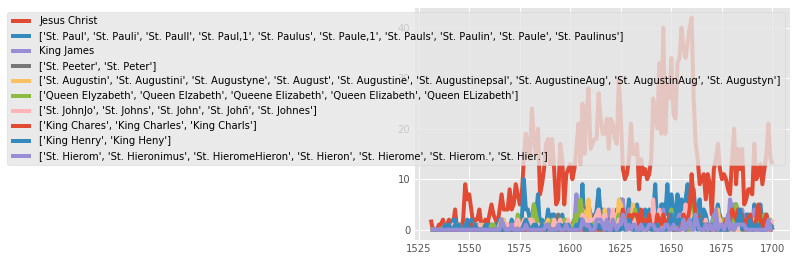

In [44]:
tf = df.T
tf.plot()

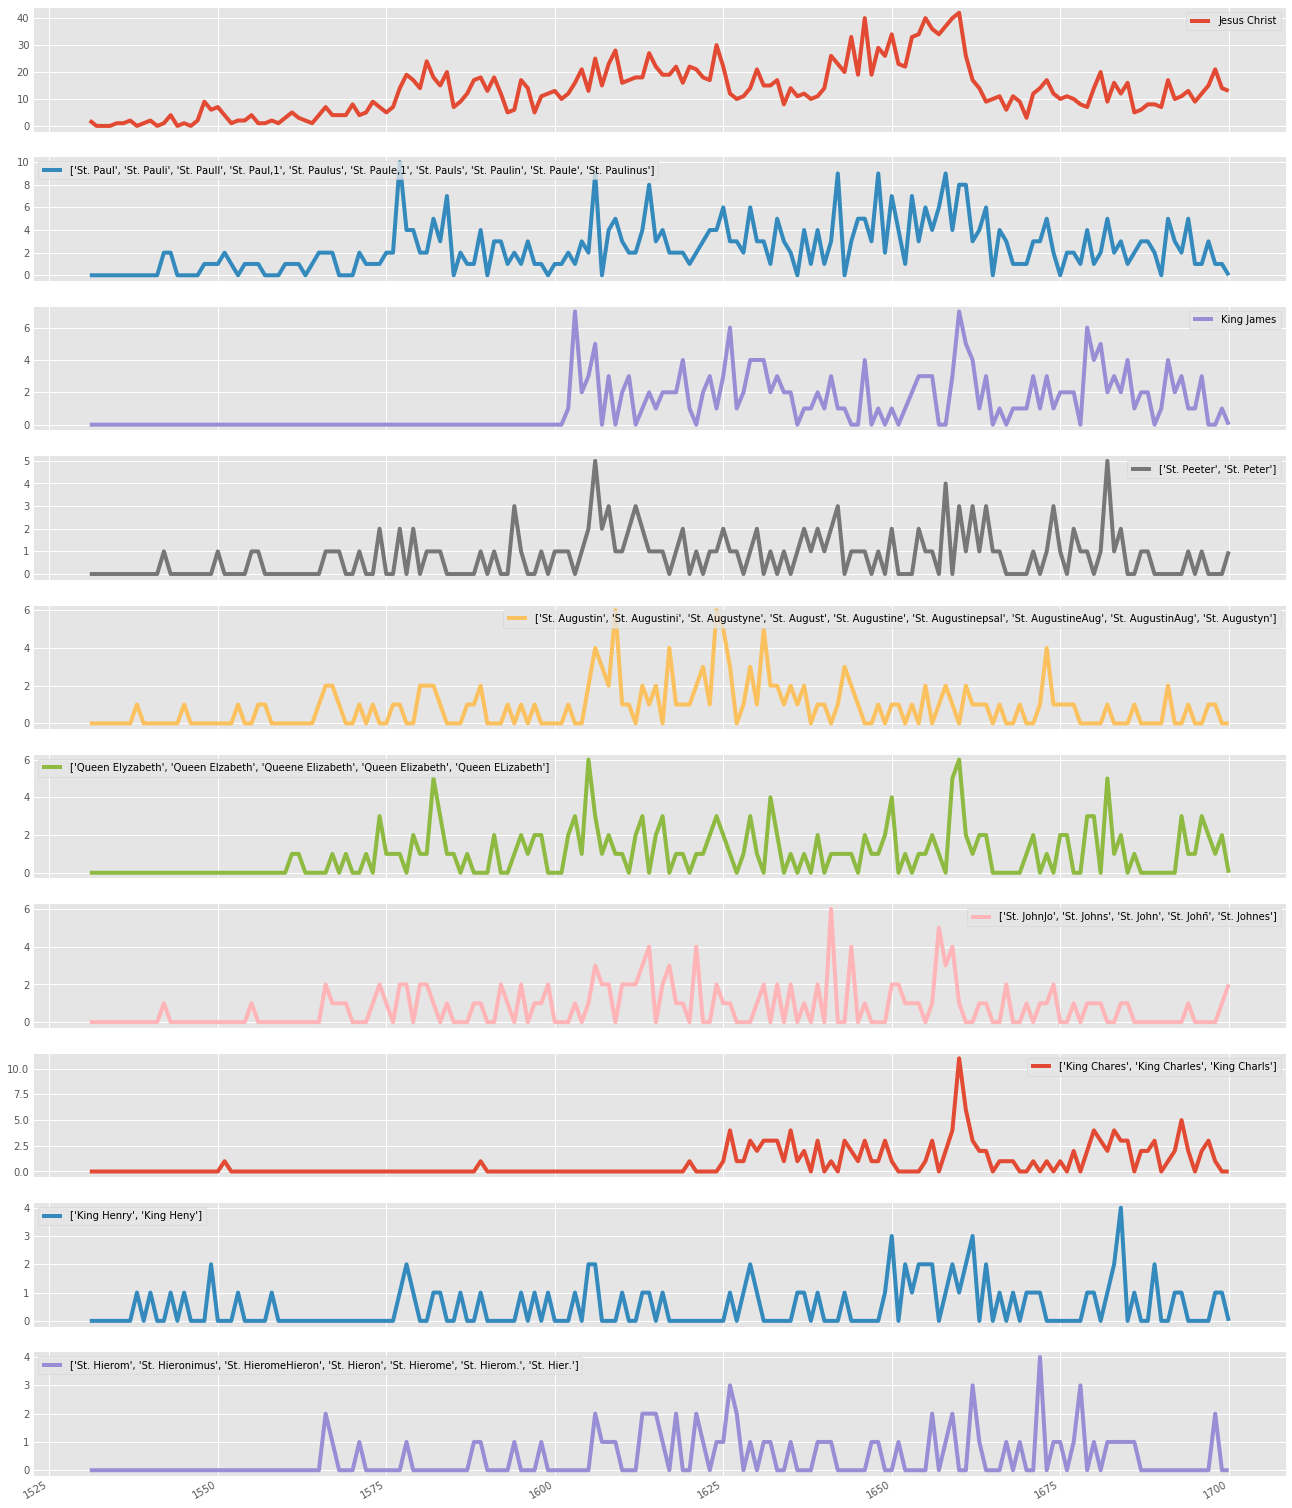

In [52]:
ax = tf.plot(subplots=True, figsize=(20,30))

In [57]:
degree_projected = {}

for year,G in graphs_by_year.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==1}
    projected_G = bipartite.projected_graph(G, sub_people_nodes)
    degree_projected[year] = dict(projected_G.degree())

# print(degree_projected)
#     if len(sub_people_nodes) > 1 and len(sub_text_nodes) > 1:
#         degree_centrality[year] = bipartite.degree_centrality(G, sub_people_nodes)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff017f55f28>,
      dtype=object)

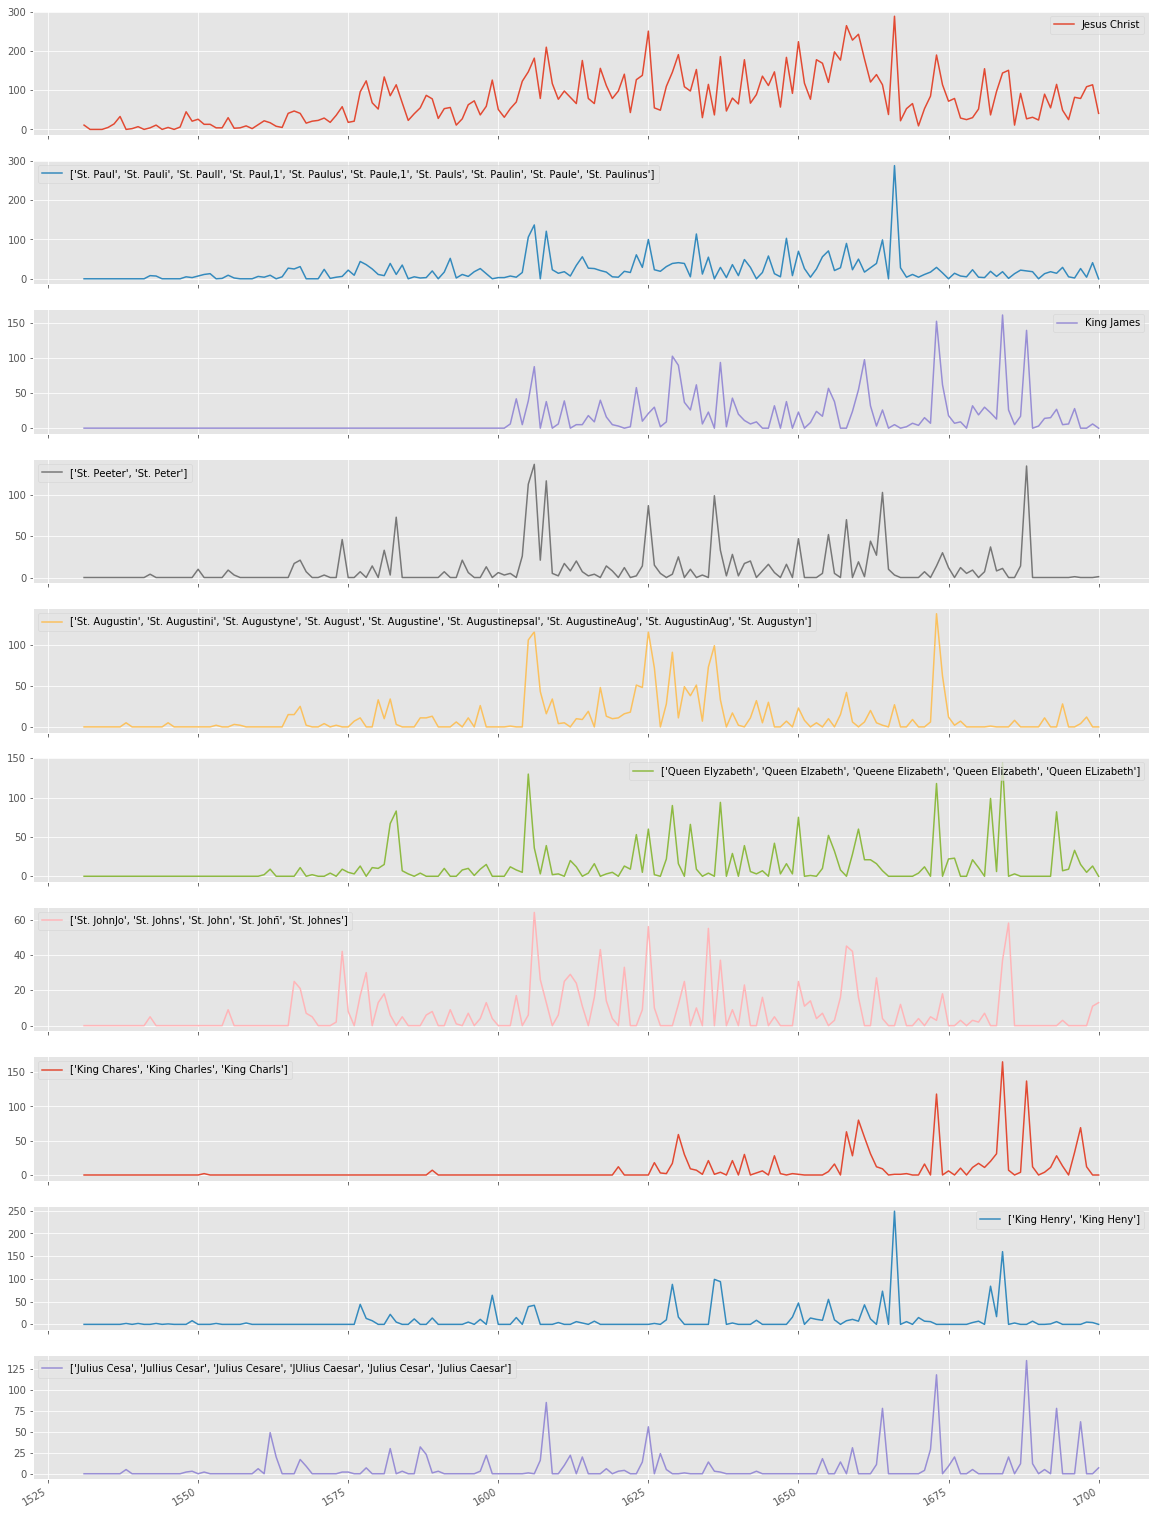

In [58]:
dcdf = create_dataframe(degree_projected,top_people)
tdcdf = dcdf.T
tdcdf.plot(subplots=True, figsize=(20,30))

In [5]:
all_betweenness = bipartite.betweenness_centrality(B, people_nodes)

In [9]:
import pickle as pkl
with open('all_betweenness.pkl', 'wb') as f:
    pkl.dump(all_betweenness, f)

In [22]:
from operator import itemgetter

with open('all_betweenness.pkl', 'rb') as newf:
    all_betweenness = pkl.load(newf)
    
all_betweenness_people = {k:v for k,v in all_betweenness.items() if k in people_nodes}
all_betweenness_sorted = sorted(all_betweenness_people.items(), key=itemgetter(1), reverse=True)
print(all_betweenness_sorted[:10])
abs_ids = [a[0] for a in all_betweenness_sorted[:10]]
top_ten_betweenness = []
for a in abs_ids:
    for n in B.nodes(data=True):
        if n[0] == a:
            top_ten_betweenness.append(n)
# top_ten_betweenness = [n for n in B.nodes(data=True) if n[0] in abs_ids]
print(top_ten_betweenness) 

[('1014540', 0.5855815007981192), ('1025452', 0.06100621600152451), ('1003023', 0.03582414258025156), ('1021103', 0.024379315181849836), ('1022189', 0.02335770872789311), ('1030589', 0.01941719475895441), ('1005539', 0.017173384947129475), ('1028742', 0.016981900364764463), ('1015145', 0.011971836927255253), ('1025158', 0.010550156559876496)]
[('1014540', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 1, 'degree': 8198, 'name_variants': 'Jesus Christ', 'title': None}), ('1025452', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 2, 'degree': 834, 'name_variants': "['St. Paul', 'St. Pauli', 'St. Paull', 'St. Paul,1', 'St. Paulus', 'St. Paule,1', 'St. Pauls', 'St. Paulin', 'St. Paule', 'St. Paulinus']", 'title': None}), ('1003023', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 3, 'degree': 316, 'name_variants': 'King James', 'title': None}), ('1021103', {'author': None, 'bipartite': 1, 'date': None, 'deg_rank': 6, 'degree': 267, 'name_variants': "['Quee

In [35]:
betweenness = {}

for year,G in graphs_by_year.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==1}
    sub_text_nodes = set(G) - sub_people_nodes
    if len(sub_people_nodes) > 1 and len(sub_text_nodes) > 1:
        betweenness[year] = bipartite.betweenness_centrality(G, sub_people_nodes)

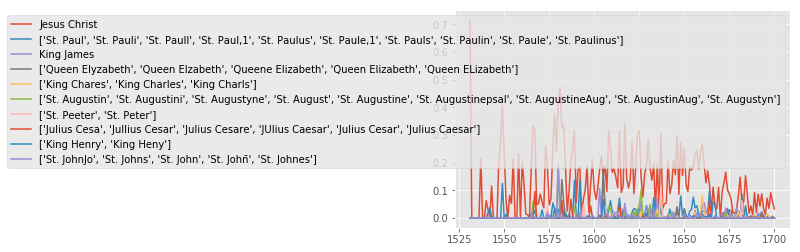

In [36]:
bdf = create_dataframe(betweenness,top_ten_betweenness)
tbdf = bdf.T
tbdf.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff01ab2cb00>,
      dtype=object)

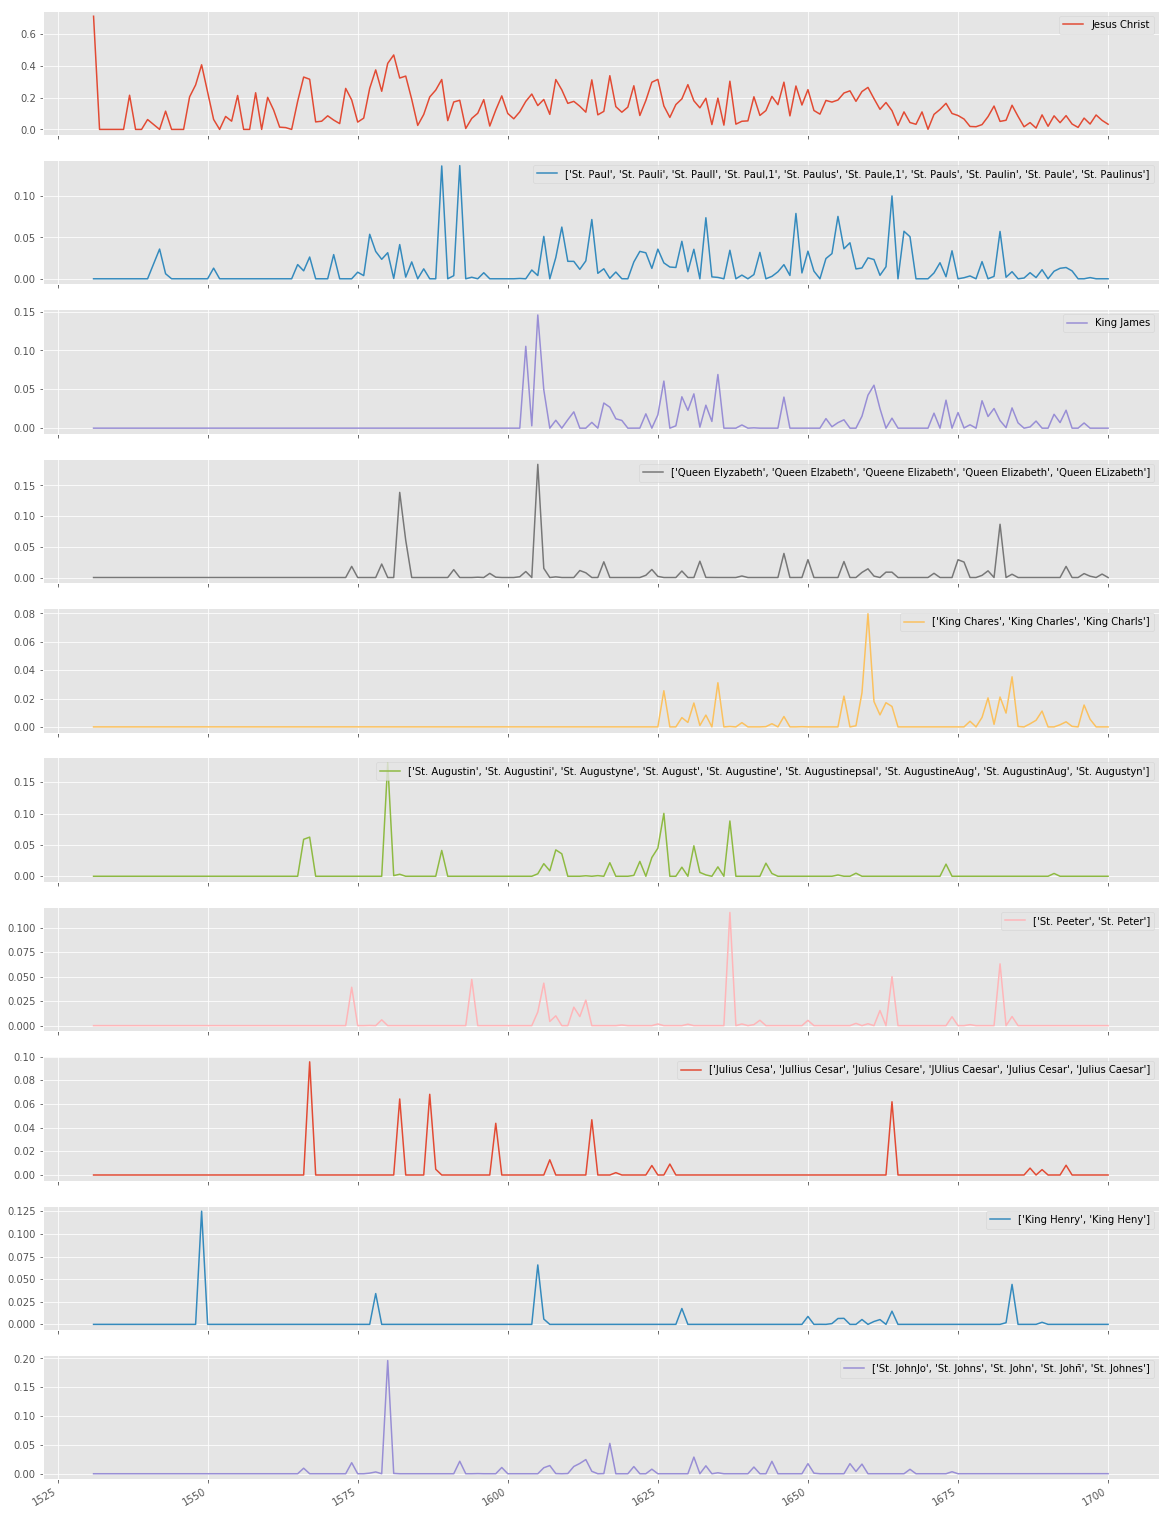

In [37]:
tbdf.plot(subplots=True, figsize=(20,30))

In [50]:
all_people = [(n,d) for n,d in B.nodes(data=True) if d['bipartite'] == 1]
all_bdf = create_dataframe(betweenness, all_people)
all_bdf.nlargest(10,columns=1603)

,1531,1532,1536,1537,1538,1539,1540,1542,1543,1544,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
Jesus Christ,0.714286,0.0,0.0,0.215686,0.0,0.0,0.062284,0.0,0.115152,0.0,...,0.085689,0.042491,0.086885,0.033993,0.01251,0.071366,0.033938,0.091062,0.056952,0.032639
King James,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.017865,0.007145,0.023081,0.000000,0.00000,0.006658,0.000000,0.000000,0.000000,0.000000
Robert Lee,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"['Andr. Willet', 'Andrew Willet']",0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"['Queen Elyzabeth', 'Queen Elzabeth', 'Queene Elizabeth', 'Queen Elizabeth', 'Queen ELizabeth']",0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.018138,0.000000,0.00000,0.006409,0.002144,0.000000,0.005610,0.000000
"['King Henrie', 'King Henrye', 'King Henry']",0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Thomas Bell,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"['John Swinerton', 'John Swinnerton', 'John Swinnarton']",0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"['Richard Jobson', 'Richard Jhonson', 'Richard Johnson']",0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"['Thomas Playfere', 'Thomas Playfore']",0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


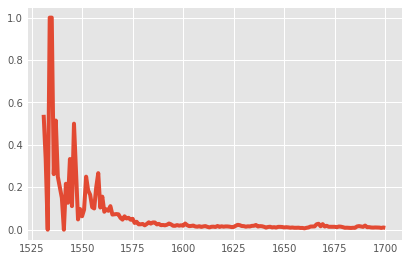

In [53]:
b_densities = []
for year,G in graphs_by_year.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==1}
    b_densities.append(bipartite.density(G, sub_people_nodes))

densities = pd.Series(b_densities, index=range(1531,1701))#pd.period_range(start='1531',end='1700', freq='Y'))
densities.plot()

Text(0, 0.5, 'Density (highest possible is 1)')

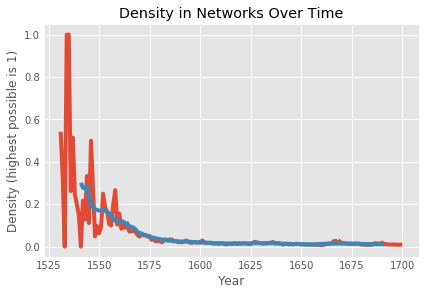

In [36]:
densities.plot()
day_densities = densities.rolling(20, center=True).mean()
ax = day_densities.plot(title='Density in Networks Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Density (highest possible is 1)')

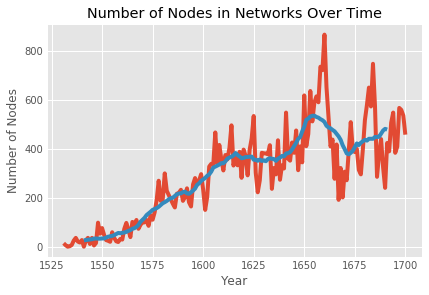

In [34]:
node_count = pd.Series([len(G.nodes()) for d,G in graphs_by_year.items()], index=range(1531,1701))#pd.period_range(start='1531',end='1700', freq='Y'))
ax = node_count.plot(title='Number of Nodes in Networks Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Nodes')
node_count.rolling(20, center=True).mean().plot()

In [60]:
protestant = [(n,d) for n, d in B.nodes(data=True) if d['bipartite']==1 and ('John Hus' in d['name_variants'] or 'John Calvin' in d['name_variants'] or 'Martin Luther' in d['name_variants'])]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff01759fc18>,
      dtype=object)

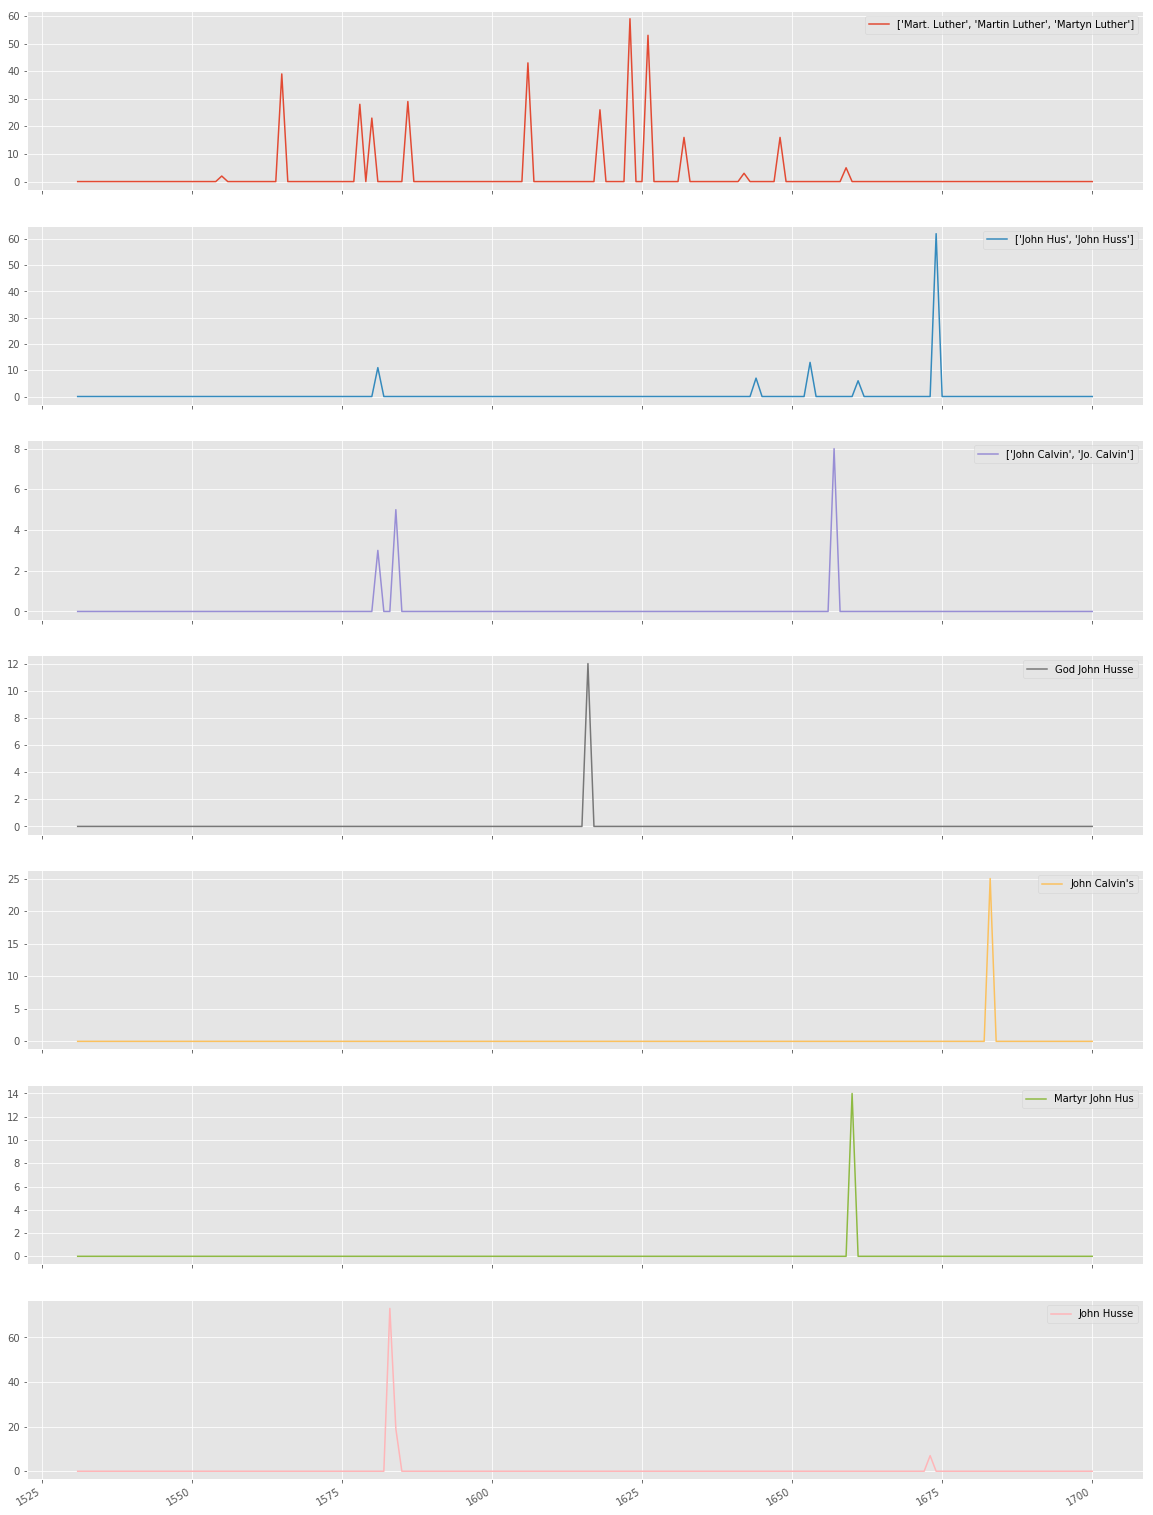

In [61]:
pdf = create_dataframe(degree_projected,protestant)
tpdf = pdf.T
tpdf.plot(subplots=True, figsize=(20,30))

In [63]:
def filter_by_range(start_year,end_year):
    nodes = []
    for n in B.nodes(data=True):
        try:
            if n[1]['date'] in range(start_year, end_year):
                nodes.append(n[0])
                nodes.extend(B.neighbors(n[0]))
        except KeyError:
            pass
    SB = B.subgraph(nodes)
    return SB

In [64]:
decade_graphs = {'1630s':filter_by_range(1630,1639),'1640s':filter_by_range(1639,1649), '1650s':filter_by_range(1650,1659), '1660s':filter_by_range(1660,1669)}

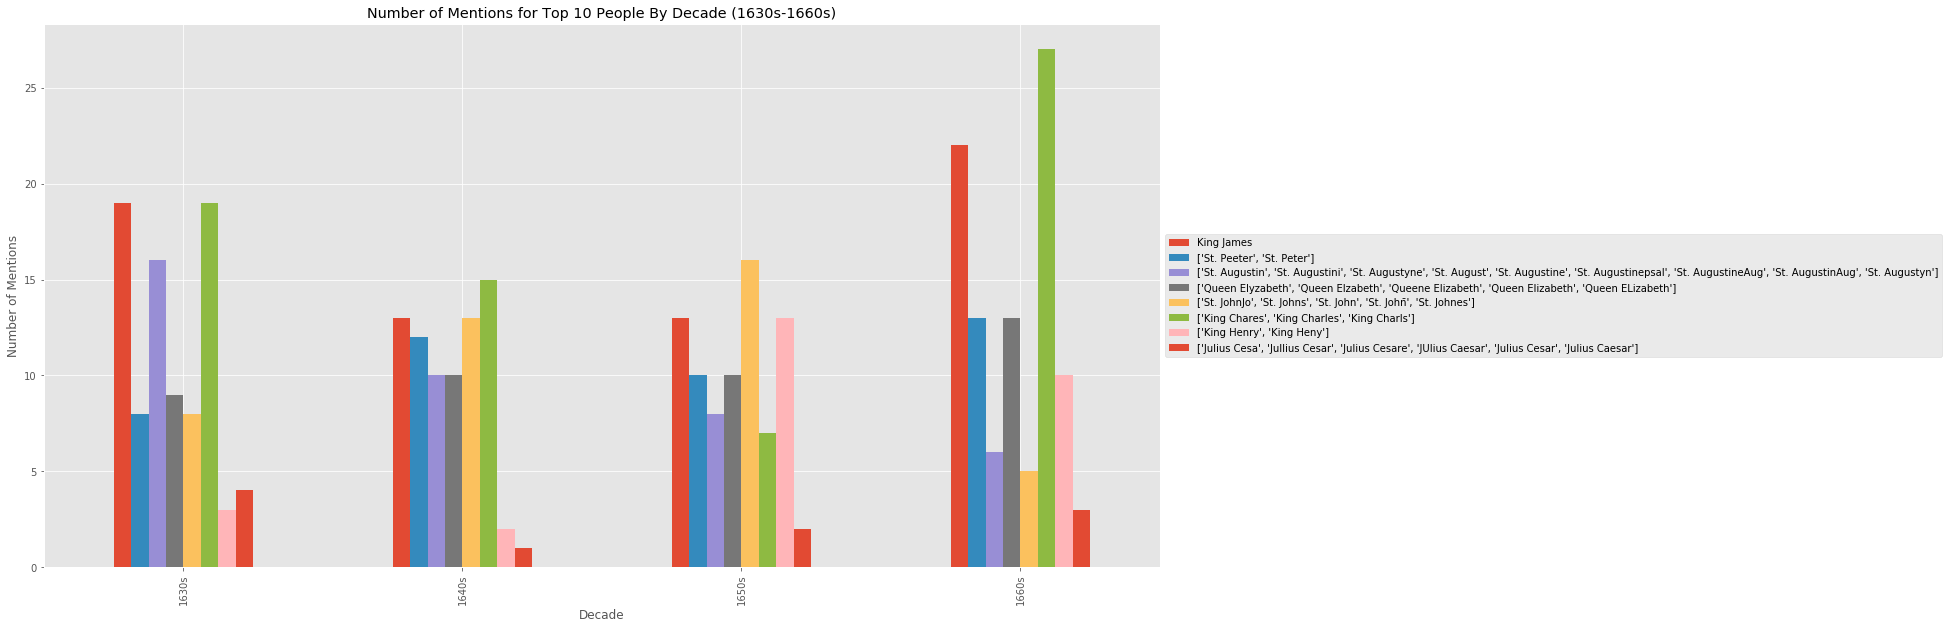

In [67]:
decade_centralities = {year:dict(G.degree()) for year,G in decade_graphs.items()}
        
dbdf = create_dataframe(decade_centralities,top_people[2:])
tdbdf = dbdf.T
ax = tdbdf.plot(kind='bar', figsize=(20,10), title="Number of Mentions for Top 10 People By Decade (1630s-1660s)")
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Mentions')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [80]:
decade_betweenness = {}

for year,G in decade_graphs.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==1}
    sub_text_nodes = set(G) - sub_people_nodes
    if len(sub_people_nodes) > 1 and len(sub_text_nodes) > 1:
        decade_betweenness[year] = bipartite.betweenness_centrality(G, sub_people_nodes)
        
with open('decade_betweenness.pkl', 'wb') as f:
    pkl.dump(decade_betweenness, f)

In [83]:
# print(decade_betweenness)
for decade,b in decade_betweenness.items():
    people_by_b = {k:v for k,v in b.items() if B.node[k]['bipartite'] == 1}
    people_by_b = sorted(people_by_b.items(), key= lambda m:m[1], reverse=True)
    print(decade)
    top_ten = people_by_b[:10]
    for t in top_ten:
        print(B.node[t[0]]['name_variants'], t[1])
    print()

1630s
Jesus Christ 0.3797640253259079
['St. Augustin', 'St. Augustini', 'St. Augustyne', 'St. August', 'St. Augustine', 'St. Augustinepsal', 'St. AugustineAug', 'St. AugustinAug', 'St. Augustyn'] 0.05575886984993333
King James 0.039340263179824926
['St. Paul', 'St. Pauli', 'St. Paull', 'St. Paul,1', 'St. Paulus', 'St. Paule,1', 'St. Pauls', 'St. Paulin', 'St. Paule', 'St. Paulinus'] 0.0317770605644912
['Queen Elyzabeth', 'Queen Elzabeth', 'Queene Elizabeth', 'Queen Elizabeth', 'Queen ELizabeth'] 0.02782462343370077
['King Chares', 'King Charles', 'King Charls'] 0.027641639300256555
['Thomas Lord Coven', 'Thomas Coven'] 0.017867717561302683
Thomas Goodwin 0.015930217450061696
['St. Peeter', 'St. Peter'] 0.01540793275338713
['Privi Council', 'Prive Council'] 0.014445054963216738

1640s
Jesus Christ 0.39708102667563094
['St. Paul', 'St. Pauli', 'St. Paull', 'St. Paul,1', 'St. Paulus', 'St. Paule,1', 'St. Pauls', 'St. Paulin', 'St. Paule', 'St. Paulinus'] 0.031999328503776535
['Thomas Fair

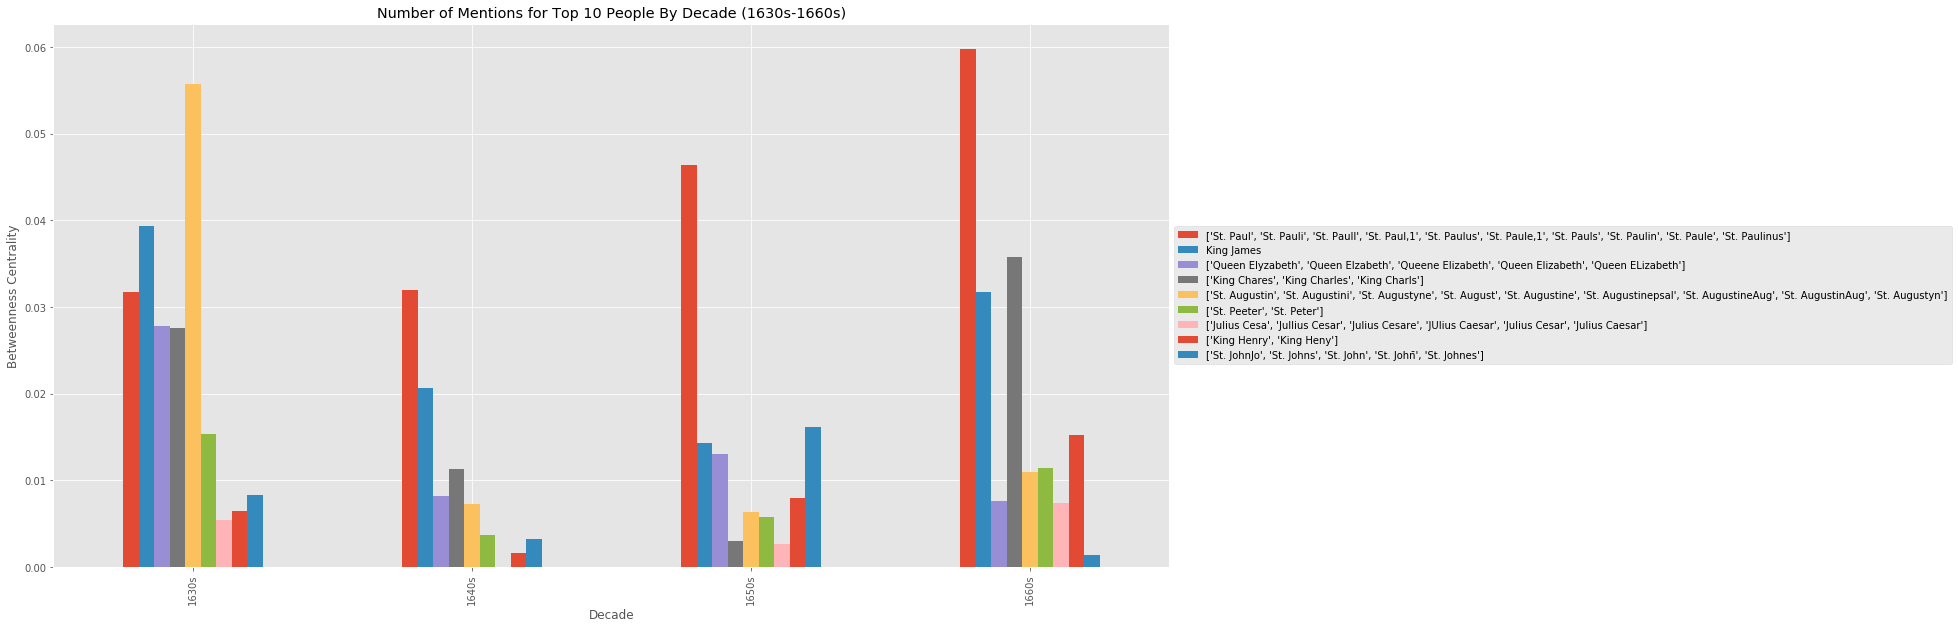

In [69]:
ddf = create_dataframe(decade_betweenness,top_ten_betweenness[1:])
tddf = ddf.T
ax = tddf.plot(kind='bar', figsize=(20,10), title="Number of Mentions for Top 10 People By Decade (1630s-1660s)")
ax.set_xlabel('Decade')
ax.set_ylabel('Betweenness Centrality')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [75]:
# fig, axes = plt.subplots(nrows=4,ncols=2)

i=0
for decade,G in decade_graphs.items():
    p = [n for n, d in G.nodes(data=True) if d['bipartite']==1]
    mentions = {n:G.degree(n) for n,d in G.nodes(data=True) if n in p}
    people_by_mentions = sorted(mentions.items(), key= lambda m:m[1], reverse=True)
    print(decade)
    top_ten = people_by_mentions[:10]
    for t in top_ten:
        print(G.node[t[0]]['name_variants'], t[1])
    print()
#     mdf = pd.Series([p[1] for p in top_twenty], index=[p[0] for p in top_twenty])
#     tmdf = mdf.T
#     print(i)
#     tmdf.plot(kind='bar', logy=True, ax=axes[i,0])#, title="Number of Mentions for Top 10 People By Decade (1630s-1660s)")
#     i += 1
    #     ax.set_xlabel('Decade')
#     ax.set_ylabel('Number of Mentions (Log Scale)')
#     plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

1630s
Jesus Christ 123
['St. Paul', 'St. Pauli', 'St. Paull', 'St. Paul,1', 'St. Paulus', 'St. Paule,1', 'St. Pauls', 'St. Paulin', 'St. Paule', 'St. Paulinus'] 22
King James 19
['King Chares', 'King Charles', 'King Charls'] 19
['St. Augustin', 'St. Augustini', 'St. Augustyne', 'St. August', 'St. Augustine', 'St. Augustinepsal', 'St. AugustineAug', 'St. AugustinAug', 'St. Augustyn'] 16
['Thomas Heywood', 'Thomas Honywood', 'Thomas Haywood'] 11
['James Shirley', 'James Shirle', 'James Shirly'] 10
['Queen Elyzabeth', 'Queen Elzabeth', 'Queene Elizabeth', 'Queen Elizabeth', 'Queen ELizabeth'] 9
['St. JohnJo', 'St. Johns', 'St. John', 'St. John̄', 'St. Johnes'] 8
['John Tailor', 'John Taylor'] 8

1640s
Jesus Christ 234
['St. Paul', 'St. Pauli', 'St. Paull', 'St. Paul,1', 'St. Paulus', 'St. Paule,1', 'St. Pauls', 'St. Paulin', 'St. Paule', 'St. Paulinus'] 42
['William Prynne', 'William Pryn', 'William Prynn'] 17
['King Chares', 'King Charles', 'King Charls'] 15
['St. JohnJo', 'St. Johns', '